In [1]:
# supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing necessary liberies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle

## Data Exploration

In [3]:
# import the dataset
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
# inspecting the dataset
print(df.shape)
print(df.columns)
print(df.info())
print(df.describe())

(10683, 11)
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
              Price
count  10683.000000
mean 

## Exploratory Data Analysis (EDA)

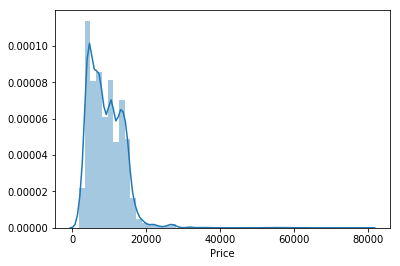

In [5]:
# Target variable: Price of tickets
sns.distplot(df['Price'])
plt.show()

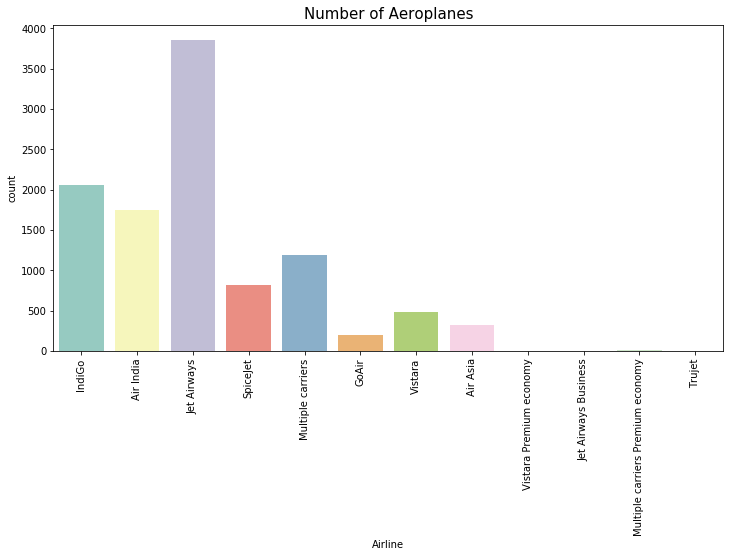

In [6]:
# count plot for Airlines
plt.figure(figsize=(12,6))
sns.countplot(df['Airline'], palette='Set3')
plt.title('Number of Aeroplanes', size=15)
plt.xticks(rotation=90)
plt.show()

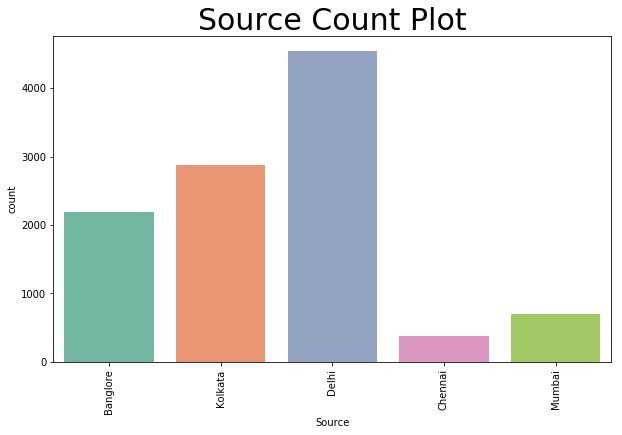

In [7]:
# count plot for Source
plt.figure(figsize=(10,6))
sns.countplot(df['Source'], palette='Set2')
plt.title('Source Count Plot', size=30)
plt.xticks(rotation=90)
plt.show()

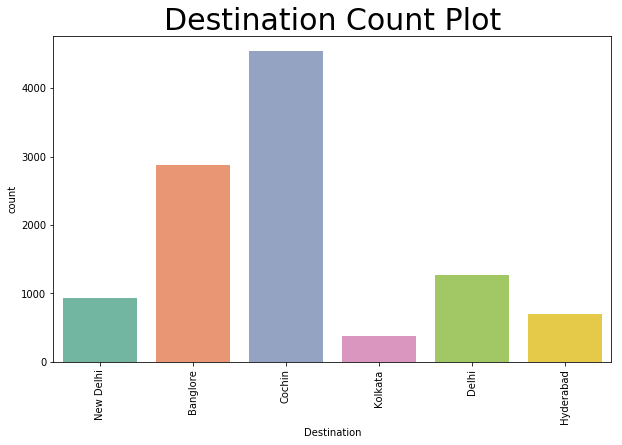

In [8]:
# coount plot for Destination
plt.figure(figsize=(10,6))
sns.countplot(df['Destination'], palette='Set2')
plt.title('Destination Count Plot', size=30)
plt.xticks(rotation=90)
plt.show()

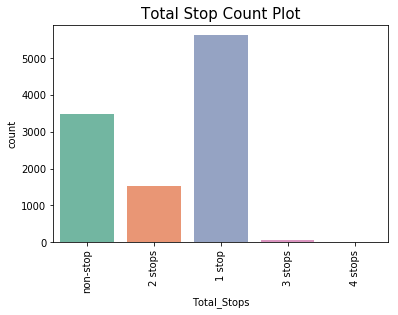

In [9]:
# count plot for total stops of airline
plt.figure(figsize=(6,4))
sns.countplot(df['Total_Stops'], palette='Set2')
plt.title('Total Stop Count Plot', size=15)
plt.xticks(rotation=90)
plt.show()

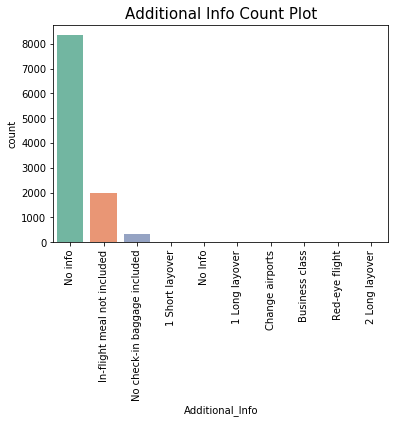

In [10]:
# count plot for additional info
plt.figure(figsize=(6,4))
sns.countplot(df['Additional_Info'], palette='Set2')
plt.title('Additional Info Count Plot', size=15)
plt.xticks(rotation=90)
plt.show()

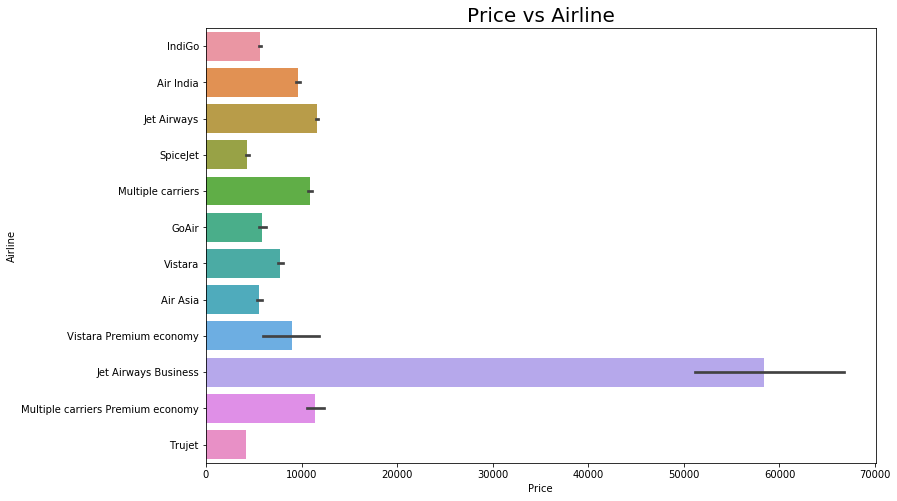

In [11]:
# bar plot with default statistic=mean
plt.figure(figsize=(12,8))
sns.barplot(x='Price', y='Airline', data=df)
plt.title('Price vs Airline', size=20)
plt.show()

## Feature Engineering

In [12]:
# Droping columns the that are not going to be useful for model building and prediction
df.drop(labels=['Route','Arrival_Time','Duration','Additional_Info'],axis=1,inplace=True)
df.dropna(inplace=True)

In [13]:
# Splitting the 'Date of Journey' column into three new columns i.e. Day, Month, Year
df['Day']= df['Date_of_Journey'].str.split('/').str[0]
df['Month']= df['Date_of_Journey'].str.split('/').str[1]
df['Year']= df['Date_of_Journey'].str.split('/').str[2]

In [14]:
# Splitting the Total Stop column into numerical only column
df['Total_Stops']=df['Total_Stops'].str.replace('non-','0 ')
df['Stops'] = df['Total_Stops'].str.split().str[0]

In [15]:
# Splitting the Deparature Hour column
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'].str.split(':').str[1]

In [16]:
# Converting the datatype o newly created features
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Stops'] = df['Stops'].astype(int)
df['Departure_Hour'] = df['Departure_Hour'].astype(int)
df['Departure_Minute'] = df['Departure_Minute'].astype(int)

In [17]:
# Now droping the extracted columns
df.drop(['Date_of_Journey','Dep_Time','Total_Stops'],axis=1,inplace=True)

In [18]:
#Label encoding executed manually
source_dict = {y:x for x,y in enumerate(df.Source.value_counts().index.sort_values())}
destination_dict = {'Banglore':0,'Cochin':1,'Delhi':2,'Kolkata': 3,'Hyderabad':4,'New Delhi':5}

In [19]:
# Label encoding using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Airline_Encoded']= le.fit_transform(df['Airline'].values)

df3 = df[['Airline']].copy()
df3['Encoded']=df['Airline_Encoded']
df3=df3.drop_duplicates('Airline').reset_index().iloc[:,1:]
d5=df3.Airline.values
d6=df3.Encoded.values
airline_dict = dict(zip(d5,d6))

df['Source_Encoded']=df['Source'].map(source_dict)
df['Destination_Encoded']=df['Destination'].map(destination_dict)
df = df.drop(['Airline','Source','Destination'],axis=1)

## Model Building

In [20]:
# Feature Selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Dividing the X & y features
X = df.drop(['Price'],axis=1)
y = df.Price

# Splitting into train and test with 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Model trainning for feature selection
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train) # fitting the trained model 
features_selected = X_train.columns[model.get_support()] # getting the important features

# All features selected except Year
X_train = X_train.drop(['Year'],axis=1)
X_test = X_test.drop(['Year'],axis=1)

In [21]:
# Random Forest Regressor model with default hyperparameter
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)

RandomForestRegressor()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred=reg.predict(X_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1239.051606184115
RMSE: 2206.6350641786407


In [23]:
# creating pickle file for model deployment
pickle.dump(reg,open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))